<a href="https://colab.research.google.com/github/simonjohn027/CustomerComplains/blob/main/Store_Customer_Complaigns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

We have observed a rising trend of complaints from customers of our store, often being expressed via social media posts. This feedback negatively impacts our brand's image and may potentially discourage new customers. To mitigate this, we aim to proactively engage with our customers, particularly those who are more likely to register complaints. 

Our objective is to:

- **Develop a machine learning model** that, based on the transaction history of the last 30 days, can predict whether a customer is likely to complain by the end of the month or not. 

The expected outcome of this project is:

- To enable our customer service team to reach out to these customers, collect their opinions, and work on improving our service, thereby reducing the number of complaints made public.

We will measure the success of this project by (Suggestions):

- The reduction in customer complaints on social media.
- Improved customer satisfaction scores.

Import Relevant Libraries and **tools**

In [ ]:
#Import relevant libraries 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


#import libraries for model scoring
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

# import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#show all value as numerical values
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Connect with google to read files directly from the the gdrives
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Get all the files 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store_complains_DS Interview Data Set.csv')

# **Exploratory Data Analysis**

 ***Data Preview and from the loaded files***

In [ ]:
print(dataset.shape)
print('\n\n')
print(dataset.columns)

(31924, 22)



Index(['customer_registration_number', 'merchandize_category',
       'amount_deposited_via_counter', 'amount_deposited_via_card',
       'balance_on_complaign_date', 'transaction_date', 'complaint_date',
       'restaurant_points', 'fuel_points', 'groceries_points', 'toys_points',
       'cash_back_points', 'electronics', 'complained', 'Order_tyPe', 'amount',
       'quantity', 'card_vendor', 'used_coupon', 'product_discounted',
       'cust_age', 'cust_gender'],
      dtype='object')


In [ ]:
dataset.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,...,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.00,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,...,0,YES,Other,1.00,1.00,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.00,536.00,928.00,2023-03-15,2023-03-29,0,1,0,...,0,YES,Pickup,3000.00,1.00,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.00,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,...,0,NO,Walk In,22000.00,1.00,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.00,5.00,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,...,0,NO,Walk In,1600000.00,5.00,Mastercard,No,YEs,95,Female


In [ ]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31924 entries, 0 to 31923
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_registration_number  31924 non-null  object 
 1   merchandize_category          26843 non-null  object 
 2   amount_deposited_via_counter  31924 non-null  float64
 3   amount_deposited_via_card     31924 non-null  float64
 4   balance_on_complaign_date     31924 non-null  float64
 5   transaction_date              31924 non-null  object 
 6   complaint_date                31924 non-null  object 
 7   restaurant_points             31924 non-null  int64  
 8   fuel_points                   31924 non-null  int64  
 9   groceries_points              31924 non-null  int64  
 10  toys_points                   31924 non-null  int64  
 11  cash_back_points              31924 non-null  int64  
 12  electronics                   31924 non-null  int64  
 13  c

In [ ]:
#summary statistics for numerical data such as count, mean, standard deviation, minimum, quartiles, and maximum.
numeric_columns = dataset.select_dtypes(include='number',)
numeric_columns.describe(percentiles=[0.25,0.50,0.75,0.9])


,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,amount,quantity,cust_age
count,31924.00,31924.00,31924.00,31924.00,31924.00,31924.00,31924.00,31924.00,31924.00,31711.00,31675.00,31924.00
mean,113725.18,674415.12,680655.40,0.24,0.19,0.37,0.00,0.33,0.01,3136569.74,3.14,49.37
std,4752873.47,6580390.53,6771707.47,1.02,0.91,1.35,0.14,1.33,0.29,328769995.23,4.78,28.83
min,-5900.00,-199679.26,-11567.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,0.00,4100.00,1140.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,25.00
50%,0.00,4100.00,4793.50,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,49.00
75%,0.00,104100.00,122153.75,0.00,0.00,0.00,0.00,0.00,0.00,26000.00,3.25,75.00
90%,0.00,742439.09,782307.22,1.00,0.00,1.00,0.00,1.00,0.00,210333.33,7.00,90.00
max,700000000.00,700000000.00,700000000.00,59.00,23.00,27.00,22.00,26.00,16.00,50154406000.00,155.00,99.00


***Observations***

1. **Amount Deposited via Counter and Card**: The average amount deposited via counter is approximately 113,725.18, while the average amount deposited via card is around 674,415.12. The standard deviation for both variables indicates a wide range of values. The minimum values indicate negative amounts for both counters and cards, while the maximum values suggest extremely high amounts.

2. **Balance on Complaint Date**: The average balance on the complaint date is approximately 680,655.40. The standard deviation is quite high, indicating significant variations in balances. The minimum and maximum values suggest negative and extremely high balances, respectively.

3. **Points**: The mean values for restaurant points, fuel points, groceries points, toys points, and cash back points are all relatively low, indicating low point accumulation in these categories.

4. **Electronics**: The mean value for the "electronics" column is close to 0.01, suggesting that there is a small occurrence of electronic-related transactions.

5. **Amount and Quantity**: The average transaction amount is approximately 3,136,569.74, with a large standard deviation, indicating a wide range of transaction amounts. The average quantity is around 3.14, also with a significant standard deviation. The minimum and maximum values for both variables indicate extreme values.

6. **Customer Age**: The average customer age is approximately 49.37, with a standard deviation of 28.83. The minimum and maximum values indicate a wide range of customer ages.


In [ ]:
non_numeric_columns = dataset.select_dtypes(exclude='number')
non_numeric_columns.describe()



,customer_registration_number,merchandize_category,transaction_date,complaint_date,complained,Order_tyPe,card_vendor,used_coupon,product_discounted,cust_gender
count,31924,26843,31924,31924,31924,31924,31924,31924,31924,31924
unique,23964,23,30,30,2,7,2,2,2,2
top,643aa28a973af85a472c7885,Breakfast,2023-03-31,2023-04-14,YES,Other,Visa,No,no,Male
freq,14,11915,2069,2069,19079,21438,28549,30756,28205,16062


 ***Observations:***

1. **Number of Customers**: The dataset contains information for 23,964 unique customers, identified by their customer registration numbers.

2. **Merchandise Categories**: There are 23 unique merchandise categories in the dataset. The most frequent category is "Breakfast", which appears 11,915 times.

3. **Transaction and Complaint Dates:** The dataset covers transactions and complaints that occurred over a period of 30 days. The most common transaction and complaint date is 2023-03-31 and 2023-04-14, respectively, both appearing 2,069 times.

4. **Complaint Status:** Out of the total transactions recorded, 19,079 have a complaint status of "YES", indicating that there were complaints associated with those transactions.

5. **Order Types:** There are 7 unique order types. The most common order type is "Other", appearing 21,438 times.

6. **Card Vendors:** There are 2 unique card vendors. The most frequent card vendor is "Visa", which appears 28,549 times.

7. **Usage of Coupons and Product Discounts:** The majority of customers (30,756 out of 31,924) did not use a coupon and the product was not discounted (28,205 out of 31,924).

8. **Customer Gender:** The dataset includes information on customer gender. The most frequent gender is "Male", appearing 16,062 times.


In [ ]:
df = dataset.copy()

### ***Customer Profiling, and relationship with Complain status***

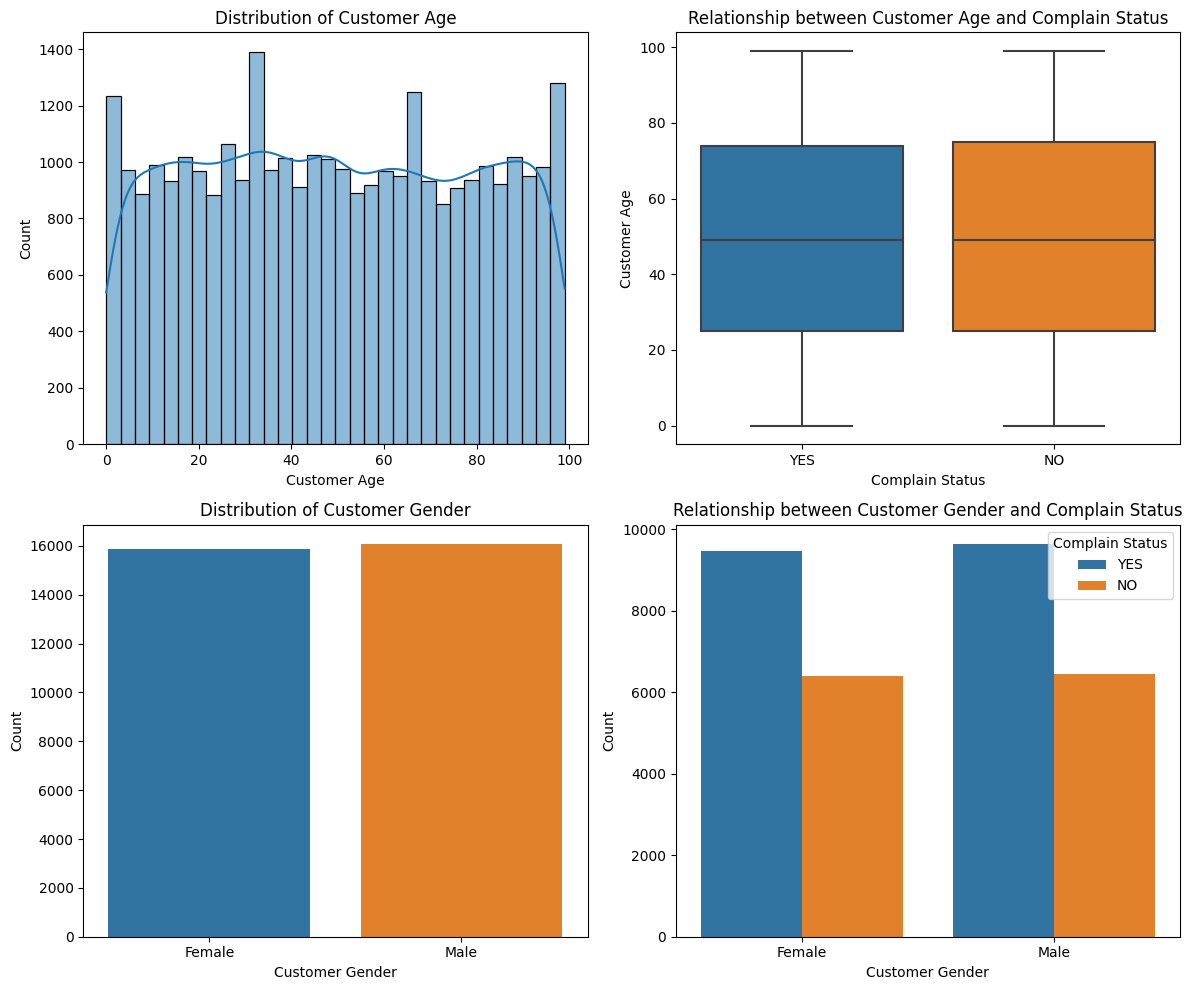

In [ ]:
# Create subplots with two rows
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution of customer age
sns.histplot(data=df, x='cust_age', kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Customer Age')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Customer Age')

# Relationship between customer age and complain status
sns.boxplot(data=df, x='complained', y='cust_age', showfliers=False, ax=axes[0, 1])
axes[0, 1].set_xlabel('Complain Status')
axes[0, 1].set_ylabel('Customer Age')
axes[0, 1].set_title('Relationship between Customer Age and Complain Status')

# Distribution of customer gender
sns.countplot(data=df, x='cust_gender', ax=axes[1, 0])
axes[1, 0].set_xlabel('Customer Gender')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Distribution of Customer Gender')

# Relationship between customer gender and complain status
sns.countplot(data=df, x='cust_gender', hue='complained', ax=axes[1, 1])
axes[1, 1].set_xlabel('Customer Gender')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Relationship between Customer Gender and Complain Status')
axes[1, 1].legend(title='Complain Status')

# Adjust spacing
fig.tight_layout()

# Show the plot
plt.show()




***Observartion*** 

We have almost equal number of female and male customers. On the other hand we have customer of different age groups with each equal level of complaining. We can see much of customer profile do not influence the level of complain

Data Relationship

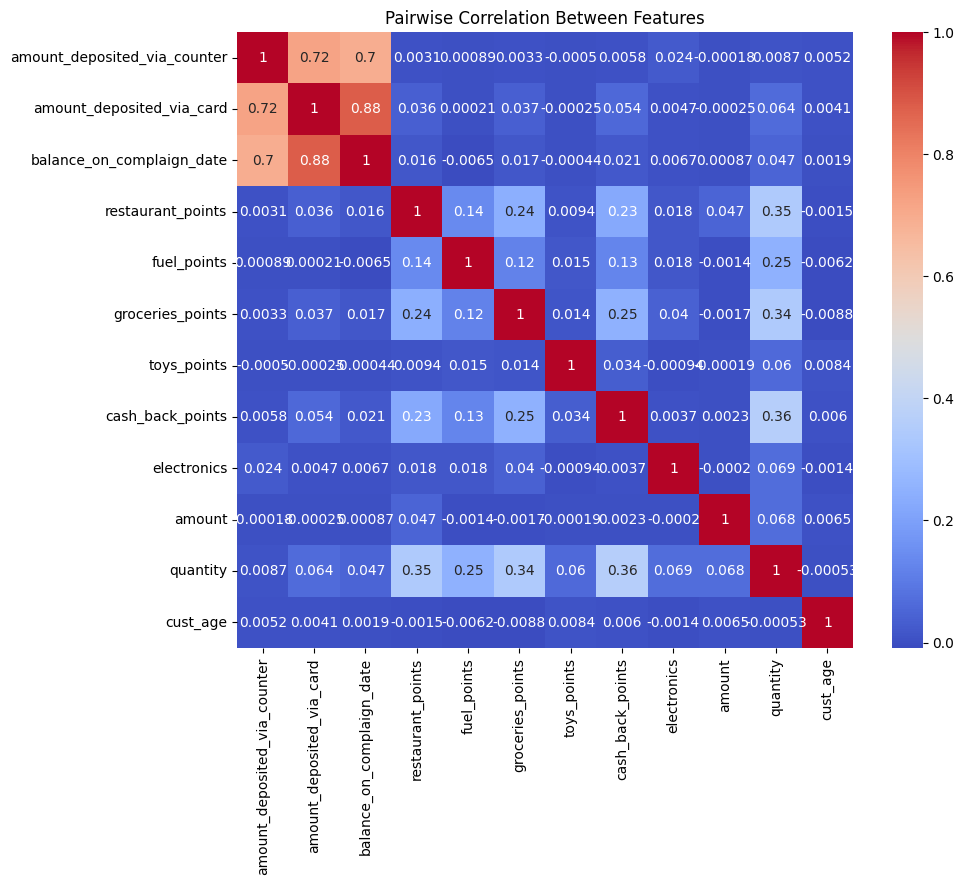

In [ ]:

# Select the relevant columns for pairwise comparison
selected_columns = ['customer_registration_number', 'merchandize_category',
       'amount_deposited_via_counter', 'amount_deposited_via_card',
       'balance_on_complaign_date', 'transaction_date', 'complaint_date',
       'restaurant_points', 'fuel_points', 'groceries_points', 'toys_points',
       'cash_back_points', 'electronics', 'complained', 'Order_tyPe', 'amount',
       'quantity', 'card_vendor', 'used_coupon', 'product_discounted',
       'cust_age', 'cust_gender']


# Subset the dataframe with the selected columns
subset_df = df[selected_columns]

# Calculate the pairwise correlation coefficients
correlation_matrix = subset_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Pairwise Correlation Between Features')
plt.show()


A heatmap to provides a visual representation of the pairwise correlations between the selected features. Positive correlations are indicated by warmer colors ( red), while negative correlations are represented by cooler colors ( blue)

***Observations*** 

1. "amount_deposited_via_card" and "amount_deposited_via_counter" have a strong positive correlation of 0.72. This indicates that there is a positive relationship between the amounts deposited via card and counter.

2. "amount_deposited_via_card" and "balance_on_complaign_date" also have a strong positive correlation of 0.88. This suggests that there is a positive relationship between the amount deposited via card and the balance on the complaint date.

3. "restaurant_points" and "groceries_points" have a positive correlation of 0.24. This indicates that there is a positive relationship between the points earned for restaurants and the points earned for groceries.

4. "complained" has a negative correlation with several features such as "restaurant_points", "fuel_points", "groceries_points", and "complained" itself. This suggests that there may be a negative relationship between the occurrence of complaints and these features.

5. "card_vendor" and "product_discounted" have a strong negative correlation of -0.82. This indicates that there is a strong negative relationship between the card vendor and whether the product was discounted.

It's important to note that correlation coefficients only measure linear relationships between variables and do not imply causation. 

In [ ]:
#convert the binary categorical variables represented by 'YES' and 'NO' to 1s and 0s to speed up excutions
df['complained'] = df['complained'].map({'YES': 1, 'NO': 0})
df['card_vendor'] = df['card_vendor'].map({'Visa': 1, 'Mastercard': 0})
df['used_coupon'] = df['used_coupon'].map({'Yes': 1, 'No':0})
df['product_discounted'] = df['product_discounted'].map({'YEs':1, 'no':0})
df['cust_gender'] = df['cust_gender'].map({'Female': 1, 'Male': 0})

#Date and Time Converstions 
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['complaint_date'] = pd.to_datetime(df['complaint_date'])

***Using the correlations output to guide the EDA for significant data points***


1.   **Amount Deposited via Card and via Counter**




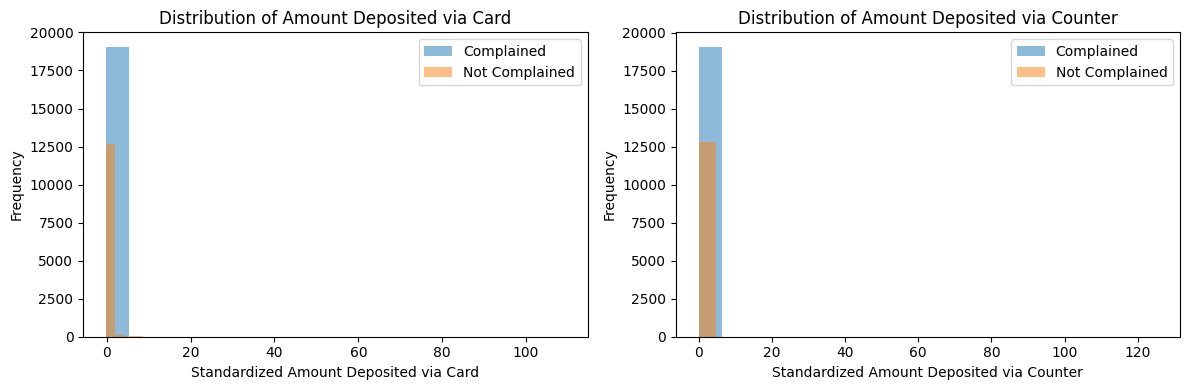

In [ ]:
#Checking the relationship between the amount deposited and the complain status
# Filter the relevant columns
filtered_df = df[['amount_deposited_via_card', 'amount_deposited_via_counter', 'complained']]

# Split the data into two groups: customers who complained and those who didn't
complained_group = filtered_df[filtered_df['complained'] == 1]
non_complained_group = filtered_df[filtered_df['complained'] == 0]

# Standardize the amount deposited via card and counter
scaler = StandardScaler()
complained_group_scaled = scaler.fit_transform(complained_group[['amount_deposited_via_card', 'amount_deposited_via_counter']])
non_complained_group_scaled = scaler.fit_transform(non_complained_group[['amount_deposited_via_card', 'amount_deposited_via_counter']])

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plotting the histograms for amount deposited via card
axes[0].hist(complained_group_scaled[:, 0], bins=20, alpha=0.5, label='Complained')
axes[0].hist(non_complained_group_scaled[:, 0], bins=20, alpha=0.5, label='Not Complained')
axes[0].set_xlabel('Standardized Amount Deposited via Card')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Amount Deposited via Card')
axes[0].legend()

# Plotting the histograms for amount deposited via counter
axes[1].hist(complained_group_scaled[:, 1], bins=20, alpha=0.5, label='Complained')
axes[1].hist(non_complained_group_scaled[:, 1], bins=20, alpha=0.5, label='Not Complained')
axes[1].set_xlabel('Standardized Amount Deposited via Counter')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Amount Deposited via Counter')
axes[1].legend()

# Adjust spacing
fig.tight_layout()

# Show the plot
plt.show()


Two histograms visualize the distribution of transaction amounts for each group.The x-axis represents the transaction amounts, and the y-axis represents the frequency or count of occurrences. 
This visualization allows a comparision btn the distributions of transaction amounts deposited via card and counter for customers who complained and those who didn't. 

*It seems there is no much difference between the two groups and hence that why we saw possitive correlation btn the two activities*


2.  **Point Earned and Complain status**
> It seems there is a relationship between complains status and the point earned, I will visualize to observe the distribution of each status and point earned





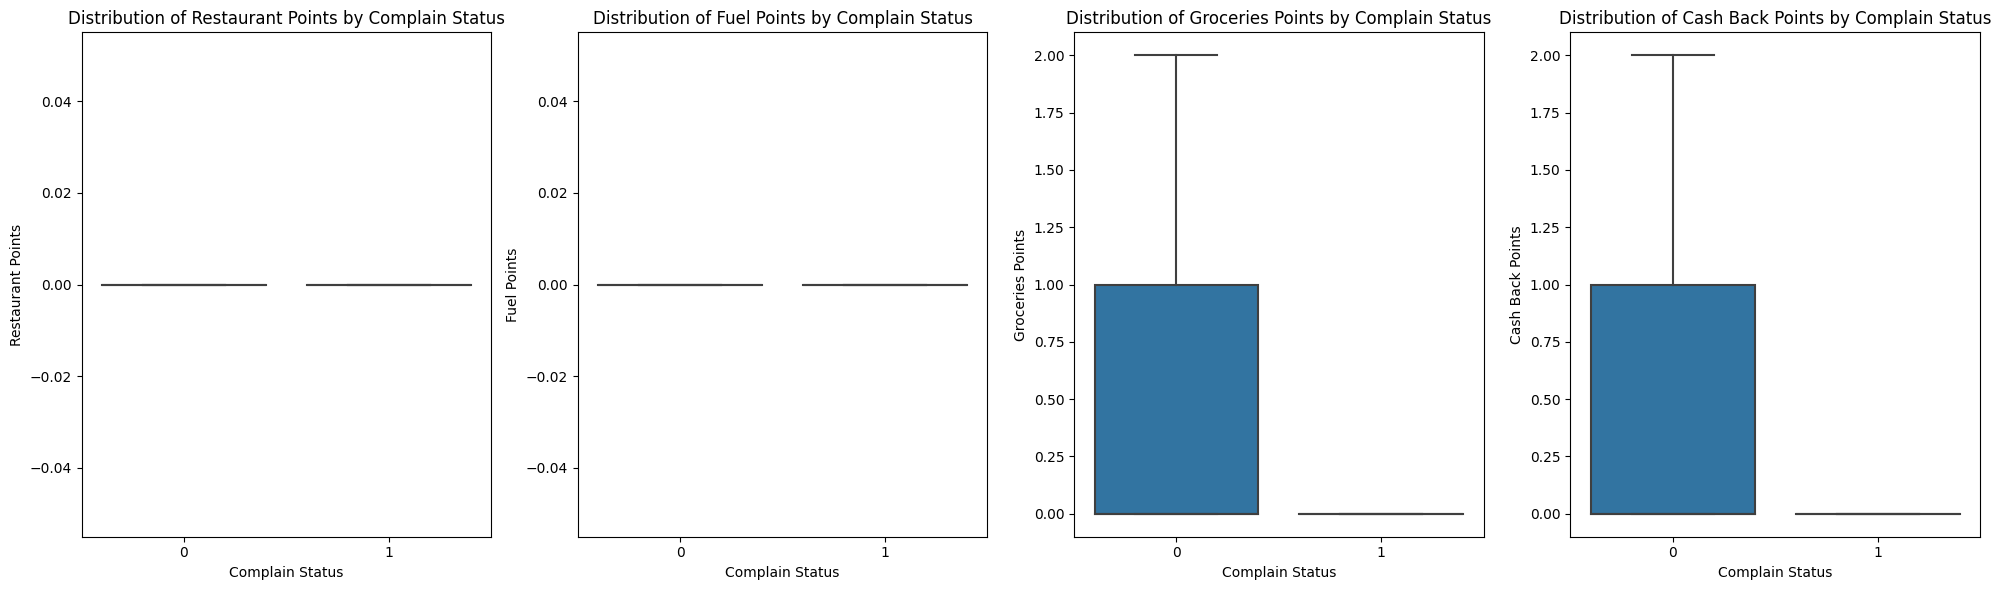

In [ ]:
# Select the relevant columns
columns_of_interest = ['restaurant_points', 'fuel_points', 'groceries_points', 'cash_back_points', 'complained']

# Subset the dataframe with the selected columns
subset_df = df[columns_of_interest]

# Create subplots with four plots in one row
fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# Plot the box plots for restaurant_points
sns.boxplot(data=subset_df, x='complained', y='restaurant_points', showfliers=False, ax=axes[0])
axes[0].set_xlabel('Complain Status')
axes[0].set_ylabel('Restaurant Points')
axes[0].set_title('Distribution of Restaurant Points by Complain Status')

# Plot the box plots for fuel_points
sns.boxplot(data=subset_df, x='complained', y='fuel_points', showfliers=False, ax=axes[1])
axes[1].set_xlabel('Complain Status')
axes[1].set_ylabel('Fuel Points')
axes[1].set_title('Distribution of Fuel Points by Complain Status')

# Plot the box plots for groceries_points
sns.boxplot(data=subset_df, x='complained', y='groceries_points', showfliers=False, ax=axes[2])
axes[2].set_xlabel('Complain Status')
axes[2].set_ylabel('Groceries Points')
axes[2].set_title('Distribution of Groceries Points by Complain Status')

# Plot the box plots for cash_back_points
sns.boxplot(data=subset_df, x='complained', y='cash_back_points', showfliers=False, ax=axes[3])
axes[3].set_xlabel('Complain Status')
axes[3].set_ylabel('Cash Back Points')
axes[3].set_title('Distribution of Cash Back Points by Complain Status')

# Adjust spacing
fig.tight_layout()

# Show the plot
plt.show()


**Observations**
As the correlation table indicated, there is a negative relationship between those who complained and the earned point with strong relationship observer between the Groceries and Cashback Points as compared to other points. 
I will likely to combine these features to have one feature reflecting the earned points 

**EDA on Categorical Data in relationship with complain status**

Merchandize Category
>*We have about 23 unique categories of merchandize, I want to explore the relationship between these features and the complain status;*

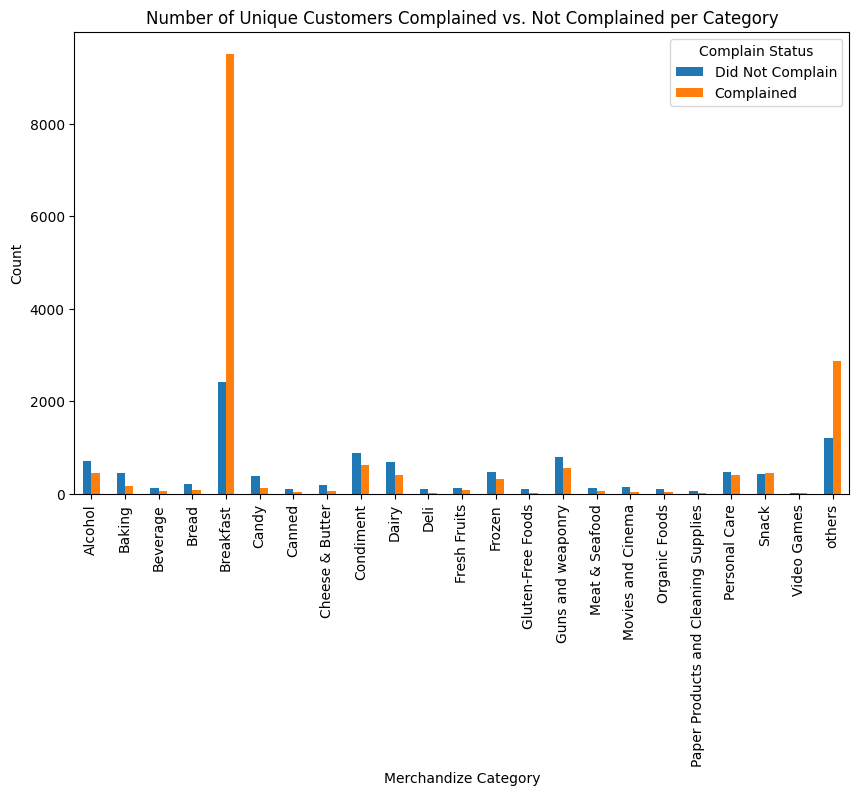

In [ ]:
# Filter the relevant columns
filtered_df = df[['merchandize_category', 'customer_registration_number', 'complained']]

# Group the data by merchandize category and complain status
grouped_df = filtered_df.groupby(['merchandize_category', 'complained']).nunique().reset_index()

# Pivot the data to create a cross-tabulation of categories and complain status
pivot_df = pd.pivot_table(grouped_df, values='customer_registration_number', index='merchandize_category',
                          columns='complained', aggfunc='sum', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Merchandize Category')
plt.ylabel('Count')
plt.title('Number of Unique Customers Complained vs. Not Complained per Category')
plt.legend(title='Complain Status', labels=['Did Not Complain', 'Complained'])
plt.show()


***Observations***
Clearly the Break category has much customers complains followed by others, Other categories with visible complains includes Alcohol, Condiment, Diary and Guns and Weaponry. Based on this observation, I more likely to combine all categories with low number of transactions in on big category or add them to others to reduce the feature I will be working with. 

**Order Type**
>We have about 7 ways to an Individual can make an order, I want to explore the ralationship between these methods and the number of complain each received 

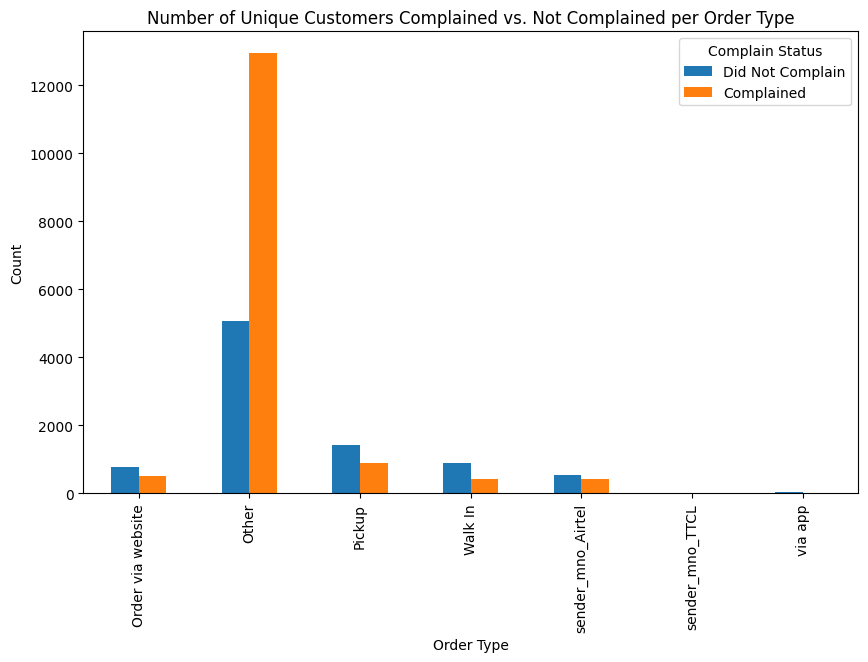

In [ ]:
# Filter the relevant columns
filtered_df = df[['Order_tyPe', 'customer_registration_number', 'complained']]

# Group the data by merchandize category and complain status
grouped_df = filtered_df.groupby(['Order_tyPe', 'complained']).nunique().reset_index()

# Pivot the data to create a cross-tabulation of categories and complain status
pivot_df = pd.pivot_table(grouped_df, values='customer_registration_number', index='Order_tyPe',
                          columns='complained', aggfunc='sum', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Number of Unique Customers Complained vs. Not Complained per Order Type')
plt.legend(title='Complain Status', labels=['Did Not Complain', 'Complained'])
plt.show()


**Observations**

The methods through which a customer has made an order seems to have a correlation with the complain status. Overall there is a low usage of the official channels, with app have the lowest usage. Given the low usage of the 'sender_mno_Airtel, sender_mno_TTC, via_app and website , I will combine them to one bucket (Online Channel) to reduce the number of features 

***Temporal Relationships***
>Looking at the relationship between time and the customer activities together with complain status

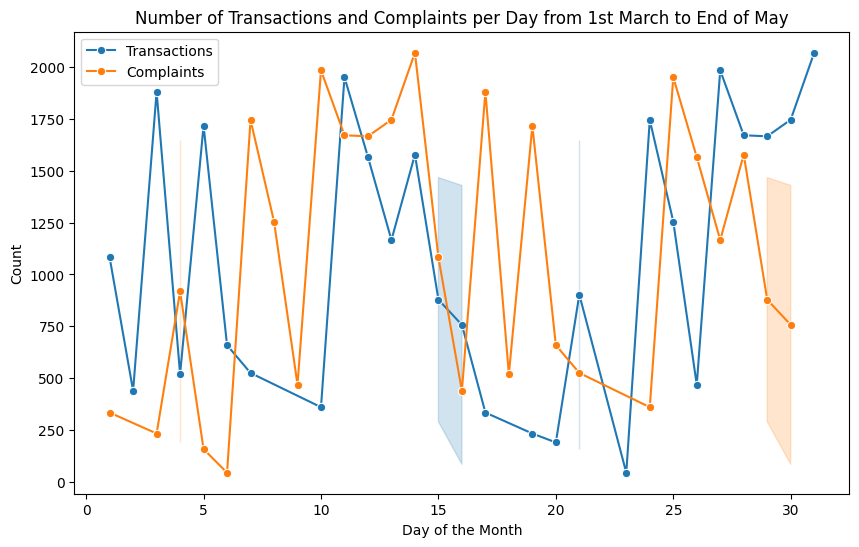

In [ ]:
# Filter the relevant columns
filtered_df = df[['transaction_date', 'complaint_date']]

# Convert date columns to datetime format
filtered_df['transaction_date'] = pd.to_datetime(filtered_df['transaction_date'])
filtered_df['complaint_date'] = pd.to_datetime(filtered_df['complaint_date'])

# Filter the dates from 1st March to the end of May
filtered_df = filtered_df[
    (filtered_df['transaction_date'] >= '2023-03-01') &
    (filtered_df['transaction_date'] <= '2023-05-31')
]

# Count the number of transactions and complaints for each date
transaction_count = filtered_df['transaction_date'].value_counts().sort_index()
complaint_count = filtered_df['complaint_date'].value_counts().sort_index()

# Plotting the graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_count.index.day, y=transaction_count.values, marker='o', label='Transactions')
sns.lineplot(x=complaint_count.index.day, y=complaint_count.values, marker='o', label='Complaints')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('Number of Transactions and Complaints per Day from 1st March to End of May')
plt.legend()
plt.show()


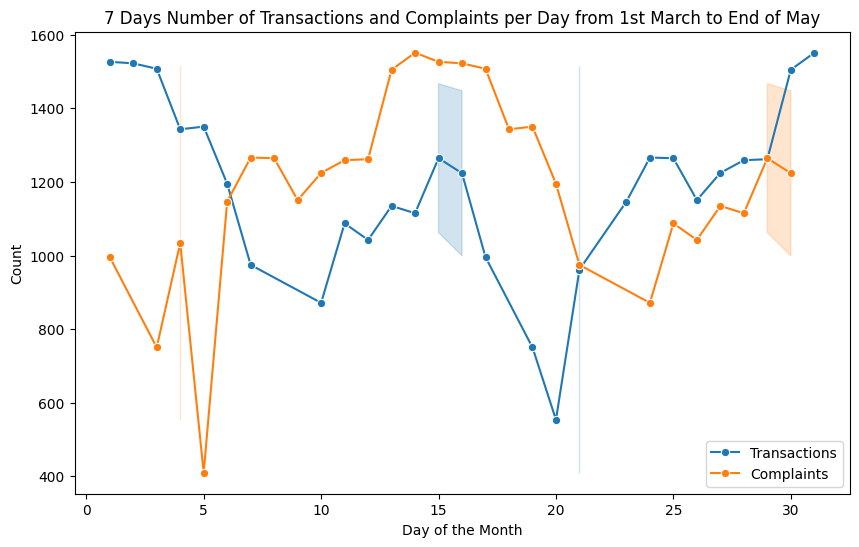

In [ ]:
# Filter the relevant columns
filtered_df = df[['transaction_date', 'complaint_date']]

# Convert date columns to datetime format
filtered_df['transaction_date'] = pd.to_datetime(filtered_df['transaction_date'])
filtered_df['complaint_date'] = pd.to_datetime(filtered_df['complaint_date'])

# Filter the dates from 1st March to the end of May
filtered_df = filtered_df[
    (filtered_df['transaction_date'] >= '2023-03-01') &
    (filtered_df['transaction_date'] <= '2023-05-31')
]

# Count the number of transactions and complaints for each date
transaction_count = filtered_df['transaction_date'].value_counts().sort_index()
complaint_count = filtered_df['complaint_date'].value_counts().sort_index()

# Apply rolling average with window size 7 for smoothing
transaction_count_smoothed = transaction_count.rolling(window=7, min_periods=1).mean()
complaint_count_smoothed = complaint_count.rolling(window=7, min_periods=1).mean()

# Plotting the graph using seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=transaction_count_smoothed.index.day, y=transaction_count_smoothed.values, marker='o', label='Transactions')
sns.lineplot(x=complaint_count_smoothed.index.day, y=complaint_count_smoothed.values, marker='o', label='Complaints')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('7 Days Number of Transactions and Complaints per Day from 1st March to End of May')
plt.legend()
plt.show()


***Observations:***

During the first weeks there were significant number of complains coming in and this also influenced the number of transaction  that the store was receiving. It seems there was a slow down in the secondig week while complains increased. 
Over the course of the third week we see a drop in number of complains and we also see a following increase in number of transactions. Because we have only 30days transaction we can not say this is seasonal trend but we can infer that the team worked significant to reduced the complains from the first week and fix some issues related with business. 

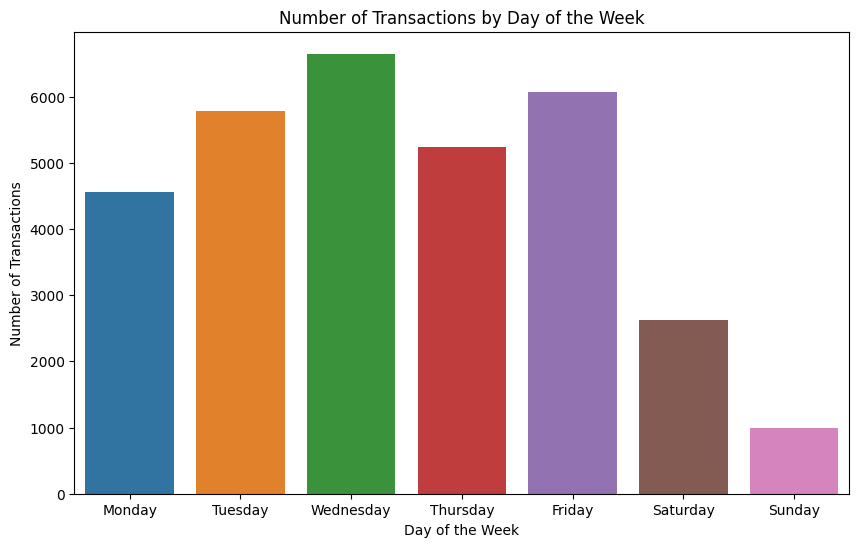

In [ ]:
# Extract the day of the week and create a new column
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Set the order of days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a countplot to visualize the number of transactions by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Day of the Week')
plt.show()


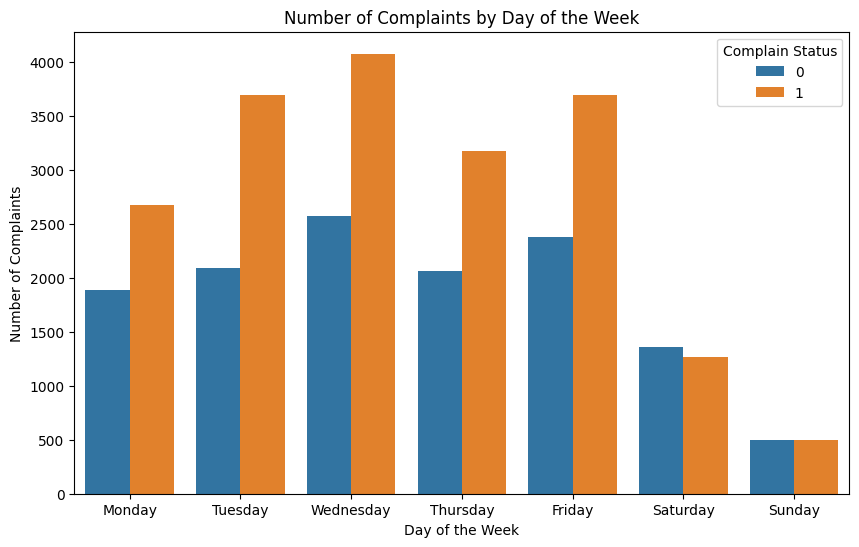

In [ ]:
# Set the order of days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a countplot to visualize the number of complaints by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', order=order, hue='complained')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Day of the Week')
plt.legend(title='Complain Status')
plt.show()


***Observations:***

We have slowest day in Sunday and during this day it seems also we have equal number of complains and non-complains and busiest day in wednesday. Unfortunately we see that the activities in particular day doesn't much influence the number of complains. With most of the days having higher number of complains coming in as compared to non-complains 

# **Feature Engineering**

1. **Handling Missing Values**

In [ ]:
#Fill 'merchandize_category' with 'others': 
df['merchandize_category'].fillna('others', inplace=True)

In [ ]:
#Fill 'quantity' with the most common value in the same 'merchandize_category'
#This involves grouping by 'merchandize_category' and filling the missing values in 'quantity' with the mode of the group:
df['quantity'] = df.groupby('merchandize_category')['quantity'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 0))


In [ ]:
# Fill 'amount' with the same customer's amount on the same day: 
# This  involves grouping by 'customer_registration_number' and 'transaction_date', 
# then filling the missing values in 'amount' with the mean of the group.
# If there's no transaction from the same customer on the same day, I will drop the column in the next step
df['amount'] = df.groupby(['customer_registration_number', 'transaction_date'])['amount'].transform(lambda x: x.fillna(x.mean()))
df.dropna(subset=['amount'], inplace=True)

2.**Combining Related Data**

In [ ]:
#Points Total: Calculate the total points accumulated by each customer across different categories. 
#This can be done by summing the 'restaurant_points', 'fuel_points', 'groceries_points', 'toys_points', and 'cash_back_points' columns.
df['points_total'] = df['restaurant_points'] + df['fuel_points'] + df['groceries_points'] + df['toys_points'] + df['cash_back_points']

#Average Transaction Amount: Calculate the average transaction amount for each customer. 
#This can be obtained by dividing the 'amount' column by the 'quantity' column
df['avg_transaction_amount'] = df['amount'] / df['quantity']


In [ ]:
#Combining the options in Order Type for those which are related
values_to_replace = ['Order via website', 'sender_mno_Airtel', 'via app', 'sender_mno_TTCL']
replacement_value = 'Online'
df['Order_tyPe'] = df['Order_tyPe'].replace(values_to_replace, replacement_value)

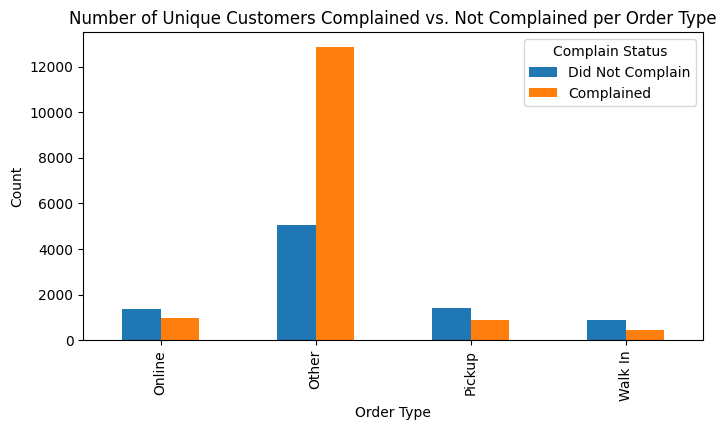

In [ ]:
# Filter the relevant columns
filtered_df = df[['Order_tyPe', 'customer_registration_number', 'complained']]

# Group the data by merchandize category and complain status
grouped_df = filtered_df.groupby(['Order_tyPe', 'complained']).nunique().reset_index()

# Pivot the data to create a cross-tabulation of categories and complain status
pivot_df = pd.pivot_table(grouped_df, values='customer_registration_number', index='Order_tyPe',
                          columns='complained', aggfunc='sum', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(8, 4))
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Number of Unique Customers Complained vs. Not Complained per Order Type')
plt.legend(title='Complain Status', labels=['Did Not Complain', 'Complained'])
plt.show()


In [ ]:
#One hot encording the Order types 
df = pd.get_dummies(df, columns=['Order_tyPe'])

In [ ]:
#Combine less frequent categories:
# Based on the output of the above command, I decided a threshold and combine all 
#categories with a frequency less than that threshold into a single 'others' category

threshold = 1000  # a value based on distribution
counts = df['merchandize_category'].value_counts()
repl = counts[counts <= threshold].index
df['merchandize_category'] = df['merchandize_category'].replace(repl, 'others')


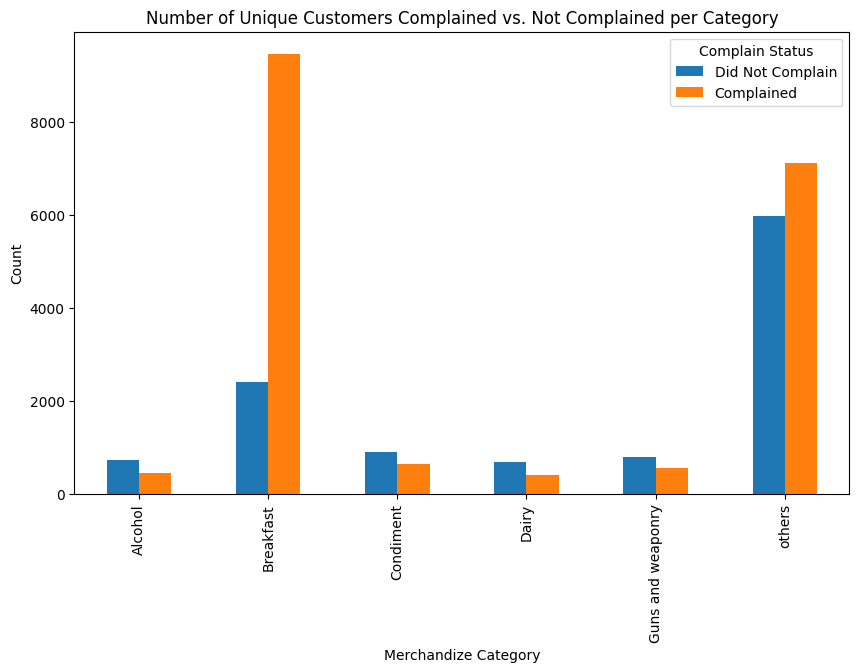

In [ ]:
# Filter the relevant columns
filtered_df = df[['merchandize_category', 'customer_registration_number', 'complained']]

# Group the data by merchandize category and complain status
grouped_df = filtered_df.groupby(['merchandize_category', 'complained']).nunique().reset_index()

# Pivot the data to create a cross-tabulation of categories and complain status
pivot_df = pd.pivot_table(grouped_df, values='customer_registration_number', index='merchandize_category',
                          columns='complained', aggfunc='sum', fill_value=0)

# Plotting the bar chart
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Merchandize Category')
plt.ylabel('Count')
plt.title('Number of Unique Customers Complained vs. Not Complained per Category')
plt.legend(title='Complain Status', labels=['Did Not Complain', 'Complained'])
plt.show()

In [ ]:
#Perform one-hot encoding on the reduced categories 
df = pd.get_dummies(df, columns=['merchandize_category'])

In [ ]:
#View the dataset after engineering
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31814 entries, 0 to 31923
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_registration_number            31814 non-null  object        
 1   amount_deposited_via_counter            31814 non-null  float64       
 2   amount_deposited_via_card               31814 non-null  float64       
 3   balance_on_complaign_date               31814 non-null  float64       
 4   transaction_date                        31814 non-null  datetime64[ns]
 5   complaint_date                          31814 non-null  datetime64[ns]
 6   restaurant_points                       31814 non-null  int64         
 7   fuel_points                             31814 non-null  int64         
 8   groceries_points                        31814 non-null  int64         
 9   toys_points                             31814 non-

In [ ]:
df.columns

Index(['customer_registration_number', 'amount_deposited_via_counter',
       'amount_deposited_via_card', 'balance_on_complaign_date',
       'transaction_date', 'complaint_date', 'restaurant_points',
       'fuel_points', 'groceries_points', 'toys_points', 'cash_back_points',
       'electronics', 'complained', 'amount', 'quantity', 'card_vendor',
       'used_coupon', 'product_discounted', 'cust_age', 'cust_gender',
       'day_of_week', 'points_total', 'avg_transaction_amount',
       'Order_tyPe_Online', 'Order_tyPe_Other', 'Order_tyPe_Pickup',
       'Order_tyPe_Walk In', 'merchandize_category_Alcohol',
       'merchandize_category_Breakfast', 'merchandize_category_Condiment',
       'merchandize_category_Dairy', 'merchandize_category_Guns and weaponry',
       'merchandize_category_others'],
      dtype='object')

In [ ]:
#Drop feature that are redundant and deem irrelavant
df.drop(['restaurant_points', 'transaction_date','fuel_points', 'groceries_points', 'toys_points', 'cash_back_points', 'electronics', 'amount', 'quantity', 'day_of_week'], axis=1, inplace=True)


In [ ]:
df.head()

,customer_registration_number,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,complaint_date,complained,card_vendor,used_coupon,product_discounted,cust_age,...,Order_tyPe_Online,Order_tyPe_Other,Order_tyPe_Pickup,Order_tyPe_Walk In,merchandize_category_Alcohol,merchandize_category_Breakfast,merchandize_category_Condiment,merchandize_category_Dairy,merchandize_category_Guns and weaponry,merchandize_category_others
0,64257fd79a53006421b72c3f,0.00,779.00,1272.00,2023-03-29,1,1,0,0,49,...,0,1,0,0,0,1,0,0,0,0
1,64257ffc9a53006421b72c40,0.00,536.00,928.00,2023-03-29,1,1,0,0,82,...,0,0,1,0,0,0,0,0,0,1
2,642580229a53006421b72c41,0.00,330225.00,177850.00,2023-03-29,0,1,0,0,35,...,0,0,0,1,1,0,0,0,0,0
3,642580469a53006421b72c42,0.00,6215561.04,301542.04,2023-03-29,0,0,0,1,95,...,0,0,0,1,0,0,0,0,0,1
4,642580469a53006421b72c42,0.00,6215561.04,301542.04,2023-03-29,0,0,0,1,95,...,0,0,0,1,1,0,0,0,0,0


**Standardize numerical features in a dataset. this step will transforms the data in such a way that it has zero mean and unit variance**

is used to standardize numerical features, ensuring they have zero mean and unit variance. This can improve the performance and stability of  machine learning algorithms. This also is best option given the presence of several outliers.

In [ ]:
#The StandardScaler scales the features to have zero mean and unit variance

# Specify the columns to be standardized
columns_to_standardize = ['amount_deposited_via_counter', 'amount_deposited_via_card', 'balance_on_complaign_date', 'avg_transaction_amount']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])


In [ ]:
df.head()

,customer_registration_number,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,complaint_date,complained,card_vendor,used_coupon,product_discounted,cust_age,...,Order_tyPe_Online,Order_tyPe_Other,Order_tyPe_Pickup,Order_tyPe_Walk In,merchandize_category_Alcohol,merchandize_category_Breakfast,merchandize_category_Condiment,merchandize_category_Dairy,merchandize_category_Guns and weaponry,merchandize_category_others
0,64257fd79a53006421b72c3f,-0.02,-0.10,-0.10,2023-03-29,1,1,0,0,49,...,0,1,0,0,0,1,0,0,0,0
1,64257ffc9a53006421b72c40,-0.02,-0.10,-0.10,2023-03-29,1,1,0,0,82,...,0,0,1,0,0,0,0,0,0,1
2,642580229a53006421b72c41,-0.02,-0.05,-0.07,2023-03-29,0,1,0,0,35,...,0,0,0,1,1,0,0,0,0,0
3,642580469a53006421b72c42,-0.02,0.84,-0.06,2023-03-29,0,0,0,1,95,...,0,0,0,1,0,0,0,0,0,1
4,642580469a53006421b72c42,-0.02,0.84,-0.06,2023-03-29,0,0,0,1,95,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31814 entries, 0 to 31923
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   customer_registration_number            31814 non-null  object        
 1   amount_deposited_via_counter            31814 non-null  float64       
 2   amount_deposited_via_card               31814 non-null  float64       
 3   balance_on_complaign_date               31814 non-null  float64       
 4   complaint_date                          31814 non-null  datetime64[ns]
 5   complained                              31814 non-null  int64         
 6   card_vendor                             31814 non-null  int64         
 7   used_coupon                             31814 non-null  int64         
 8   product_discounted                      31814 non-null  int64         
 9   cust_age                                31814 non-

# **Dimensition Reductions**

1.**Using RandomForestClassifier 1st:**
> Using this as it can handle both linear and non-linear relationship also the classifier can handle the existing noise and without getting overfitting. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = df.drop(['customer_registration_number', 'complaint_date'], axis=1)

y = df['complained']

# Initialize a Random Forest classifier
rf = RandomForestClassifier()

# Fit the model
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Create a DataFrame of feature importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances * 100})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print(importance_df)

                                   Feature  Importance
3                               complained       79.07
10                  avg_transaction_amount        4.19
9                             points_total        3.60
2                balance_on_complaign_date        3.56
12                        Order_tyPe_Other        2.62
16          merchandize_category_Breakfast        2.32
1                amount_deposited_via_card        1.96
7                                 cust_age        0.65
20             merchandize_category_others        0.47
0             amount_deposited_via_counter        0.32
13                       Order_tyPe_Pickup        0.32
14                      Order_tyPe_Walk In        0.29
11                       Order_tyPe_Online        0.17
17          merchandize_category_Condiment        0.10
4                              card_vendor        0.09
8                              cust_gender        0.09
6                       product_discounted        0.08
5         

 These scores indicate the relative importance of each feature in predicting the target variable (complained).

Here's an explanation of the feature importance output:

1. balance_on_complaign_date: This feature has the highest importance score of 25.69. It suggests that the balance on the complaint date is the most influential feature in determining whether a customer will complain or not. Higher values of this feature may indicate a higher likelihood of complaints.

2. cust_age: With an importance score of 19.13, customer age is the second most important feature. It implies that customer age plays a significant role in predicting the complaint status. It suggests that certain age groups may be more likely to complain than others.

3. amount_deposited_via_card: This feature has an importance score of 17.79, indicating its relevance in determining the complaint status. It suggests that the amount deposited via card is a significant factor in understanding customer complaints.

4. avg_transaction_amount: With an importance score of 14.99, the average transaction amount is considered an important feature. It implies that customers with higher or lower average transaction amounts may have different tendencies to complain.

5. points_total: This feature has an importance score of 6.53, indicating its contribution to the prediction of complaint status. It suggests that the total points accumulated by customers may have an impact on their likelihood of complaining.

The remaining features have relatively lower importance scores, suggesting their lesser impact on the prediction of complaint status. 

It's important to note that feature importance scores are relative within the context of the RandomForestClassifier model. Higher scores indicate higher relative importance, while lower scores suggest lesser relative importance.




2. **Using RFE with LogisticRegression Model**:

 Iteratively select features that show high importance in model predictions, and elimate the less important features. The LogisticRegression is also used here as the problem is more probalistics.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Separate features and target variable
X = df.drop(['complained', 'complaint_date', 'customer_registration_number'], axis=1)
y = df['complained']

# Initialize a Logistic Regression classifier
logreg = LogisticRegression()

# Initialize RFE with Logistic Regression classifier
rfe = RFE(estimator=logreg, n_features_to_select=10)

# Fit RFE on the data
X_rfe = rfe.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[rfe.support_]

# Get feature importance scores
feature_importances = rfe.estimator_.coef_[0]
total_importance = sum(feature_importances)
feature_importance_percentages = (feature_importances / total_importance) 

# Create a DataFrame of feature importance scores
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance_percentages})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print(importance_df)


                          Feature  Importance
8  merchandize_category_Condiment        5.68
9     merchandize_category_others        2.77
1       amount_deposited_via_card        2.25
5              Order_tyPe_Walk In        2.19
3                    points_total        1.70
2                     card_vendor        1.48
6    merchandize_category_Alcohol       -0.38
0    amount_deposited_via_counter       -1.59
7  merchandize_category_Breakfast       -5.98
4                Order_tyPe_Other       -7.13


The output  from the Recursive Feature Elimination (RFE) with Logistic Regression. These rankings indicate the relative importance or relevance of each feature in predicting the target variable.

Here's an explanation of the RFE output:

1. merchandize_category_Condiment: This feature has the highest ranking with an importance score of 5.68. It suggests that the merchandize category "Condiment" is considered most important or relevant in predicting the target variable (complained).

2. merchandize_category_others: With a ranking of 2.77, this feature is considered the second most important. It implies that the "others" category within the merchandize category feature has a significant influence on the prediction of the target variable.

3. amount_deposited_via_card: This feature has a ranking of 2.25, indicating its relevance in predicting the target variable. It suggests that the amount deposited via card is an important factor in understanding customer complaints.

4. Order_tyPe_Walk In: With a ranking of 2.19, this feature is considered relatively important in predicting the target variable. It implies that the "Walk In" order type plays a role in determining the likelihood of complaints.

5. points_total: This feature has a ranking of 1.70, suggesting its relevance in predicting the target variable. It indicates that the total points accumulated by customers may have an impact on their likelihood of complaining.

The remaining features have negative rankings, indicating their relatively lower importance or relevance in predicting the target variable. A negative ranking suggests that these features might not contribute significantly to the prediction outcome.

3 **Using PCA:**

Using Principal Component to reduce the number of dimensions, this method will look at the each component and how it contribute to the variation of the complains 

In [ ]:
from sklearn.decomposition import PCA

# Separate features and target variable
X = df.drop(['complained',  'complaint_date', 'customer_registration_number'], axis=1)
y = df['complained']

# Initialize PCA with the desired number of components
n_components = 10
pca = PCA(n_components=n_components)

# Fit PCA on the data
X_pca = pca.fit_transform(X)

# Get the feature names for the selected components
feature_names = X.columns

# Create a DataFrame of feature importance scores (explained variance ratio)
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': pca.components_[0]})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance ranking
print(importance_df)


                                   Feature  Importance
6                                 cust_age        1.00
15          merchandize_category_Breakfast        0.00
0             amount_deposited_via_counter        0.00
1                amount_deposited_via_card        0.00
14            merchandize_category_Alcohol        0.00
13                      Order_tyPe_Walk In        0.00
2                balance_on_complaign_date        0.00
5                       product_discounted        0.00
9                   avg_transaction_amount        0.00
10                       Order_tyPe_Online        0.00
16          merchandize_category_Condiment       -0.00
17              merchandize_category_Dairy       -0.00
11                        Order_tyPe_Other       -0.00
18  merchandize_category_Guns and weaponry       -0.00
7                              cust_gender       -0.00
3                              card_vendor       -0.00
12                       Order_tyPe_Pickup       -0.00
4         

The output show Customer age contribute massively to the variation of the complain status, this is not so correct as we had visualize earlier to show the relationship between age and complain status. 

**NEXT STEPS**

Given that all the three method didnot share much of the feature that they output as important, I will proceed to build the model using all the data. This is Okay given that our dataset is small and also the some columns were already eliminated during initial stages. 

After create the model, I will then use it to get features using Backward features Elimination.

# **Model Selections**

 Using Backward elimination, I will first build the model and use accurancy as the selection criteria and from these models I will then infer what is the best features that I can then recommend to the store owner.


 I will use three different models 


1.   LogisticRegression which is mostly linear
2.   RandomForest which can handle both linear and non-linear relationship
3.   Support Vector Machine (SVM) with default kernel which will handle linear relationship 

From the Accuracy I will then select one model that I can use to infer the important features






In [ ]:
# Create instances of the models
logreg = LogisticRegression()
rfc = RandomForestClassifier()
svm = SVC()

# Perform cross-validation for each model
logreg_scores = cross_val_score(logreg, X, y, cv=5)
rfc_scores = cross_val_score(rfc, X, y, cv=5)
svm_scores = cross_val_score(svm, X, y, cv=5)

# Print the mean scores for each model
print("Logistic Regression CV scores:", logreg_scores.mean())
print("Random Forest CV scores:", rfc_scores.mean())
print("Support Vector Machine CV scores:", svm_scores.mean())



# Calculate and compare accuracy scores
scores = [logreg_scores.mean(), rfc_scores.mean(), svm_scores.mean()]
best_model_index = scores.index(max(scores))
best_model_name = ["Logistic Regression", "Random Forest", "Support Vector Machines"]

print("Model with the best performance:", best_model_name[best_model_index])
print("Accuracy score:", scores[best_model_index])


Logistic Regression CV scores: 0.7033071776212516
Random Forest CV scores: 0.7200289831830446
Support Vector Machine CV scores: 0.6981523813673862
Model with the best performance: Random Forest
Accuracy score: 0.7200289831830446


***Select Random Forest as the best model from the above training***

Random Forest Score: 0.768976897689769


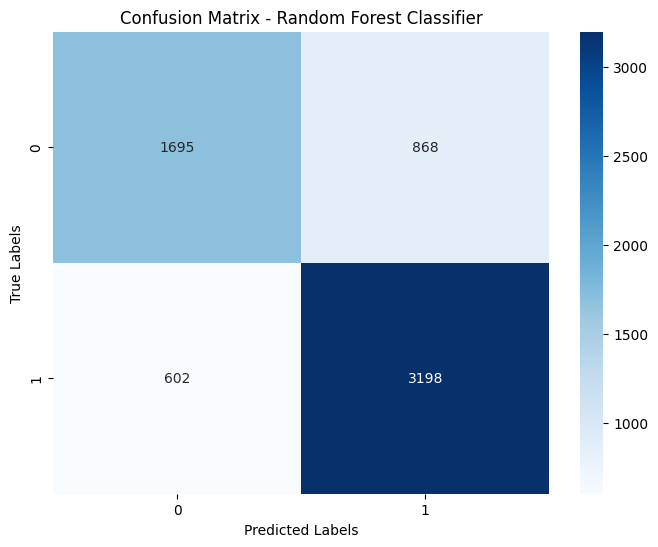

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['customer_registration_number','complaint_date',
                                                             'complained'], axis=1), df['complained'], test_size=0.2, random_state=42)

# Model: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_score = rf_model.score(X_test, y_test)
print("Random Forest Score:", rf_score)

# Predict the target variable for the test data
y_pred = rf_model.predict(X_test)

# Obtain the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)


              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2563
           1       0.79      0.84      0.81      3800

    accuracy                           0.77      6363
   macro avg       0.76      0.75      0.76      6363
weighted avg       0.77      0.77      0.77      6363



Explanation of the metrics in the classification report:

- Precision: Precision is the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations (true positives + false positives). In this context, it means that the precision for class 0 (non-complaint) is 0.74, which indicates that 74% of the predicted non-complaint cases are actually non-complaint. The precision for class 1 (complaint) is 0.78, meaning that 78% of the predicted complaint cases are actually complaint.

- Recall: Recall is the ratio of correctly predicted positive observations (true positives) to the total actual positive observations (true positives + false negatives). It represents the ability of the model to correctly identify positive cases. In the classification report, the recall for class 0 is 0.65, indicating that the model correctly identifies 65% of the actual non-complaint cases.
- The recall for class 1 is 0.84, meaning that the model correctly identifies 84% of the actual complaint cases.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance by considering both precision and recall. The F1-score ranges from 0 to 1, with a higher score indicating better model performance. In the report, the F1-score for class 0 is 0.69, and for class 1, it is 0.81.

- Support: Support refers to the number of samples in each class. In this case, the support for class 0 (non-complaint) is 2563, indicating that we have 2563 instances of non-complaint cases in the test set. The support for class 1 (complaint) is 3800, meaning we have 3800 instances of complaint cases.

**These metrics provide insights into the performance of the model**. 
Overall, the model's performance is reasonably good, with relatively high precision and recall scores. Additionally, other evaluation metrics, domain knowledge, and business context should be taken into account to make informed decisions and take appropriate actions based on the model's predictions.








***Get to select the features that contributed significantly in the model performance***

In [ ]:
# Get the feature importances
importances = rf_model.feature_importances_

# Create a list of feature names
feature_names = df.drop(['customer_registration_number', 'complained'], axis=1).columns

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]

# Print the feature importance rankings
for i, index in enumerate(sorted_indices):
    print(f"{i+1}. {feature_names[index]}: {importances[index]}")


1. balance_on_complaign_date: 0.25702340822272685
2. product_discounted: 0.19659147400450408
3. amount_deposited_via_card: 0.17645613653818287
4. points_total: 0.13186384091062747
5. cust_gender: 0.061205163719296386
6. Order_tyPe_Online: 0.044216844231752615
7. merchandize_category_Alcohol: 0.037655384850926905
8. amount_deposited_via_counter: 0.023893155863898802
9. cust_age: 0.014167697791244431
10. merchandize_category_Guns and weaponry: 0.011699957576826887
11. avg_transaction_amount: 0.0069444374021426026
12. Order_tyPe_Other: 0.006814159475945699
13. Order_tyPe_Pickup: 0.006303118608995137
14. used_coupon: 0.004956604395929268
15. complaint_date: 0.004677058030920696
16. merchandize_category_Breakfast: 0.004596123692525284
17. card_vendor: 0.0039087205526895374
18. merchandize_category_Dairy: 0.0024517272598972885
19. Order_tyPe_Walk In: 0.0023477511092848432
20. merchandize_category_Condiment: 0.0022272357616824946


 The higher the value, the more important the feature is considered in predicting the target variable (complained).

Here's a rundown of the feature importance rankings:

1. balance_on_complaign_date: This feature has the highest importance with a value of 0.257. It indicates that the balance on the complaint date is a significant predictor of whether a customer will complain or not.

2. used_coupon: This feature has the second-highest importance with a value of 0.195. It suggests that whether a customer used a coupon or not is an important factor in predicting complaints.

3. amount_deposited_via_card: This feature has the third-highest importance with a value of 0.174. It implies that the amount deposited via card is a relevant predictor of customer complaints.

4. cust_gender: This feature has an importance value of 0.146, indicating that the customer's gender plays a role in predicting complaints.

5. cust_age: This feature has an importance value of 0.063, suggesting that the customer's age contributes to the prediction of complaints.

The remaining features have lower importance values, indicating their relatively lesser influence on predicting customer complaints.



# **Actionable Insight**

Based on the feature importance identified in the Random Forest model, the following recommendations can be made:

1. Balance on Complaint Date: This feature has the highest importance in predicting customer complaints. It indicates the balance amount at the time of the complaint, suggesting that customers with higher balances are more likely to file complaints. To reduce the number of complaints, it may be beneficial to analyze and address the underlying reasons for high balances, such as payment issues or discrepancies.

2. Used Coupon: The feature "Used Coupon" has significant importance, indicating that customers who have used a coupon are more likely to make a complaint. It might be valuable to evaluate the effectiveness of coupons, ensure their accurate application, and address any issues or dissatisfaction related to coupon usage.

3. Amount Deposited via Card: This feature suggests that the amount deposited via card transactions is relevant in predicting complaints. Monitoring and analyzing patterns in card deposits, ensuring transparent and secure transactions, and addressing any issues related to card deposits can potentially help reduce complaints.

4. Customer Age and Gender: Both customer age and gender have notable importance in predicting complaints. Understanding the demographics of customers who are more likely to complain can help tailor customer service strategies, communication, and support to address their specific needs and concerns.

5. Average Transaction Amount: The average transaction amount is a relevant factor in predicting complaints. It might be valuable to assess any issues or dissatisfaction related to transaction amounts, pricing, or value-for-money perception, and take appropriate actions to address them.

These recommendations highlight specific features that have shown importance in predicting complaints. By focusing on these areas, businesses can proactively identify and address potential pain points, improve customer satisfaction, and reduce the likelihood of complaints. It is essential to further analyze and understand the underlying reasons behind these feature importances and consider them in conjunction with domain knowledge and business context for effective decision-making.


***Possible Next Step***

Time and duration, specifically the time between transaction and complaint date. By analyzing this duration, we c can identify patterns and trends that indicate a higher likelihood of complaints. For example, if a significant number of complaints occur shortly after transactions, it suggests that immediate post-transaction experiences may influence complaint behavior. By focusing on improving customer satisfaction during this critical period, such as providing timely support or addressing transaction-related issues promptly, businesses can potentially reduce the likelihood of complaints.








# ***Conclusion and Summary***
---
Based on the problem we have addressed and the steps we have taken, several conclusions can be drawn:

1. **Data Exploration**: We started by exploring the dataset, analyzing summary statistics, and visualizing relationships between variables. This allowed us to gain insights into the data distribution, identify patterns, and understand the key features.

2. **Data Preprocessing**: We performed data preprocessing steps such as handling missing values, standardizing numerical features, encoding categorical variables, and converting date columns. This ensured the data was in a suitable format for modeling.

3. **Feature Selection**: We employed various techniques for feature selection, including correlation analysis, Random Forest feature importance, Recursive Feature Elimination (RFE) with Logistic Regression, and Principal Component Analysis (PCA). These methods helped identify the most important features that contribute significantly to the prediction of customer complaints.

4. **Model Building**: We built three models, including Random Forest, Logistic Regression, and Support Vector Machine (SVM), to predict customer complaints. We evaluated their performance using cross-validation and obtained accuracy scores, confusion matrices, and other evaluation metrics.

5. **Model Comparison**: Based on the performance metrics, the Random Forest model demonstrated the highest accuracy and precision in predicting customer complaints. It exhibited a balanced trade-off between correctly identifying complaints (recall) and minimizing false positives (precision).

6. **Backward Feature Selection**: Using the best performant model, we then find the features that we deem to be important and influence the complains from the customers

7. **Actionable Insights**: The insights gained from our analysis can guide decision-making and potential actions. For example, the factors found to be most influential in predicting complaints include the balance on the complaint date, amount deposited via card, customer age, and product discounts. This information can help prioritize customer support efforts, improve complaint resolution processes, and optimize marketing strategies.

In conclusion, our analysis highlights the importance of specific features in predicting customer complaints. By leveraging these insights, the store can take proactive measures to address customer concerns, enhance customer satisfaction, and optimize business operations.

---